In [1]:
# Import dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
from pitch_abbrev import pitch_abbrev

Brandon Beachy:
- UCL injury around 6/18/2012

In [2]:
# Import csv file with pitcher data
pitcher = pd.read_csv("Brandon_Beachy.csv")
pitcher.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2015-07-20,81.4,-1.62,5.81,"Beachy, Brandon",457727,545404,strikeout,called_strike,...,0,0,4,4,0,Standard,Standard,NaN,-0.016,-0.349
1,FF,2015-07-20,90.0,-0.99,6.20,"Beachy, Brandon",457727,545404,NaN,foul,...,0,0,4,4,0,Standard,Standard,NaN,0.000,-0.115
2,CU,2015-07-20,69.9,-1.45,6.28,"Beachy, Brandon",457727,545404,NaN,swinging_strike,...,0,0,4,4,0,Standard,Standard,NaN,0.000,-0.068
3,CH,2015-07-20,79.3,-1.88,5.73,"Beachy, Brandon",607054,545404,double,hit_into_play,...,0,0,4,4,0,Standard,Standard,NaN,0.114,2.215
4,FF,2015-07-20,86.3,-1.46,5.94,"Beachy, Brandon",605538,545404,walk,ball,...,0,0,2,2,0,Standard,Standard,NaN,0.018,0.156


In [3]:
# Calculate the number of different types of pitches
pitch_count = pitcher.groupby("pitch_type").count()
pitch_count = pitch_count[["release_speed"]]
pitch_count = pitch_count.rename(columns={"release_speed": "number_of_pitches"})
pitch_count

,number_of_pitches
pitch_type,
CH,552
CU,449
FF,2775
FT,23
IN,52
PO,2
SL,766


In [4]:
# Pitches with less than 50 data points will be removed
pitcher = pitcher.merge(pitch_count, on="pitch_type")
pitcher = pitcher.loc[pitcher["number_of_pitches"]>50]
pitcher.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,number_of_pitches
0,CH,2015-07-20,81.4,-1.62,5.81,"Beachy, Brandon",457727,545404,strikeout,called_strike,...,0,4,4,0,Standard,Standard,NaN,-0.016,-0.349,552
1,CH,2015-07-20,79.3,-1.88,5.73,"Beachy, Brandon",607054,545404,double,hit_into_play,...,0,4,4,0,Standard,Standard,NaN,0.114,2.215,552
2,CH,2015-07-20,79.0,-1.82,5.92,"Beachy, Brandon",519345,545404,field_out,hit_into_play,...,0,2,2,0,Standard,Standard,NaN,-0.011,-0.155,552
3,CH,2015-07-20,79.6,-1.66,5.75,"Beachy, Brandon",346874,545404,NaN,foul,...,0,2,2,0,Standard,Standard,NaN,0.000,0.000,552
4,CH,2015-07-20,80.3,-1.94,5.77,"Beachy, Brandon",607054,545404,strikeout,swinging_strike,...,0,2,2,0,Standard,Standard,NaN,-0.016,-0.152,552


In [5]:
# Get pitch types
pitch_types = pitcher.groupby("pitch_type").count()
pitch_types = pitch_types.index.values
pitch_types

array(['CH', 'CU', 'FF', 'IN', 'SL'], dtype=object)

In [6]:
# Sort into data frames by pitch type
pitches = []
for pitch in pitch_types:
    pitches.append([pitcher.loc[pitcher["pitch_type"]==pitch], pitch_abbrev[pitch]])

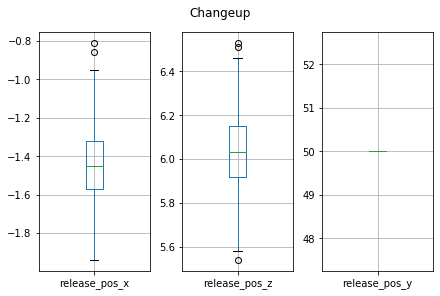

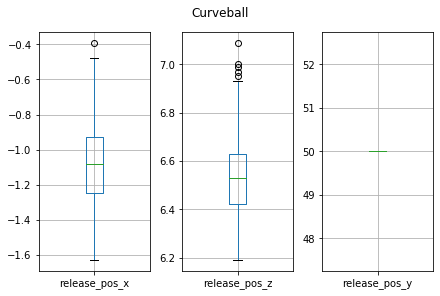

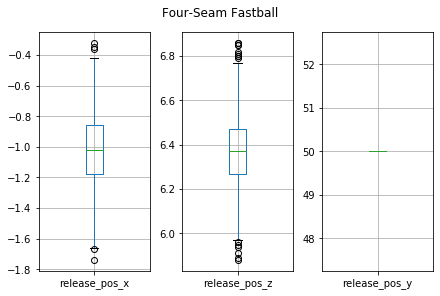

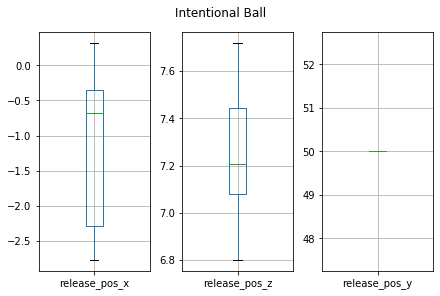

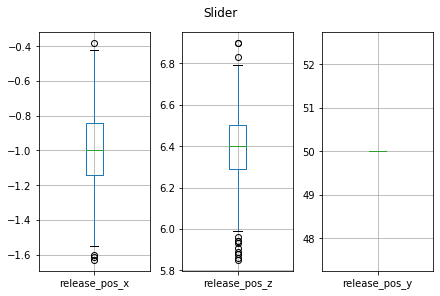

In [7]:
# Create box plot for each pitch type to look at outliers from mean relase point
for pitch in pitches:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6,4), constrained_layout=True)
    pitch[0].boxplot(column=["release_pos_x"], ax=ax[0])
    pitch[0].boxplot(column=["release_pos_z"], ax=ax[1])
    pitch[0].boxplot(column=["release_pos_y"], ax=ax[2])
    fig.suptitle(pitch[1])
    plt.show()

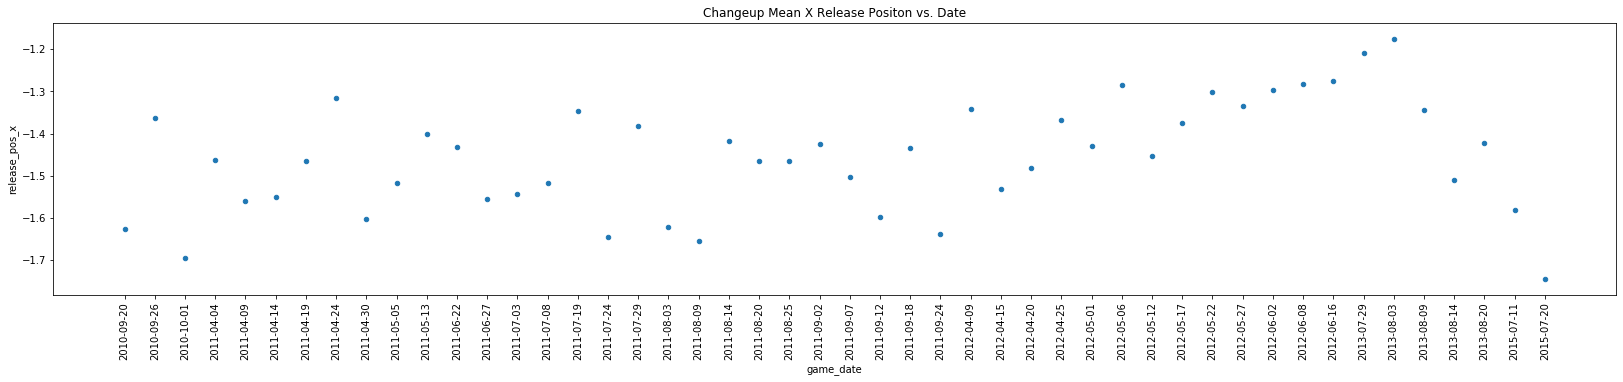

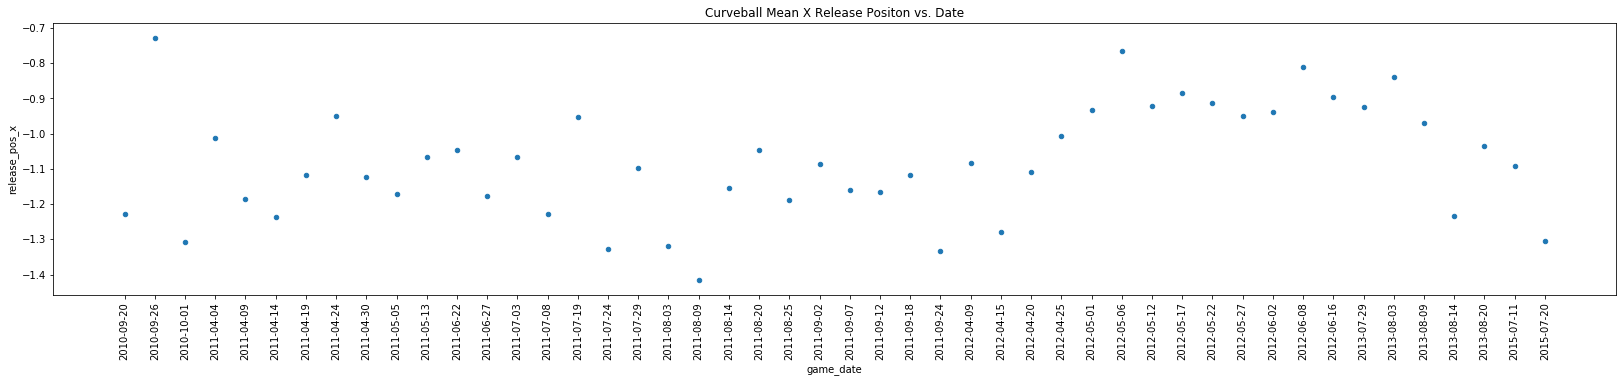

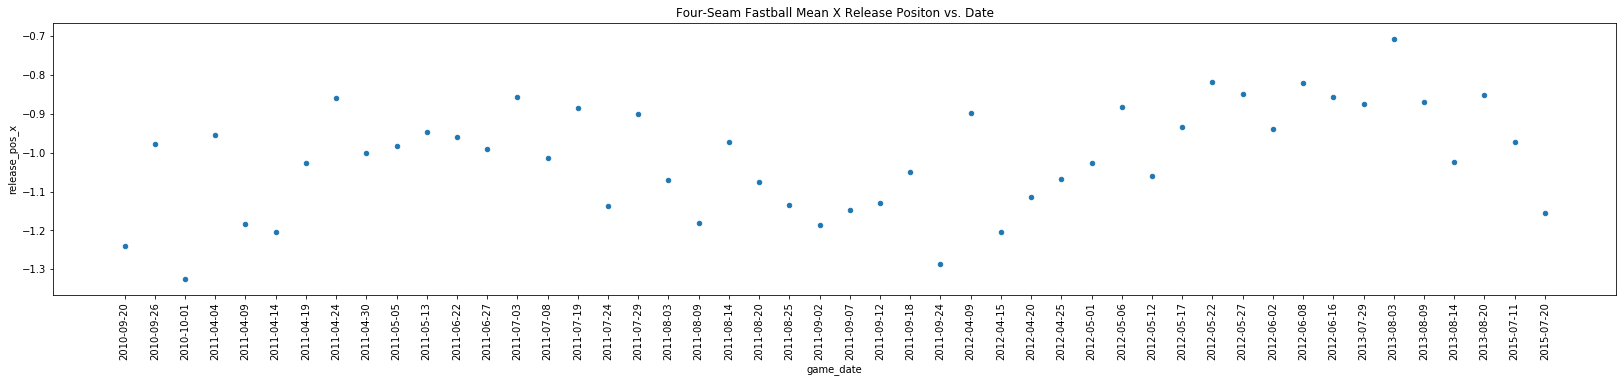

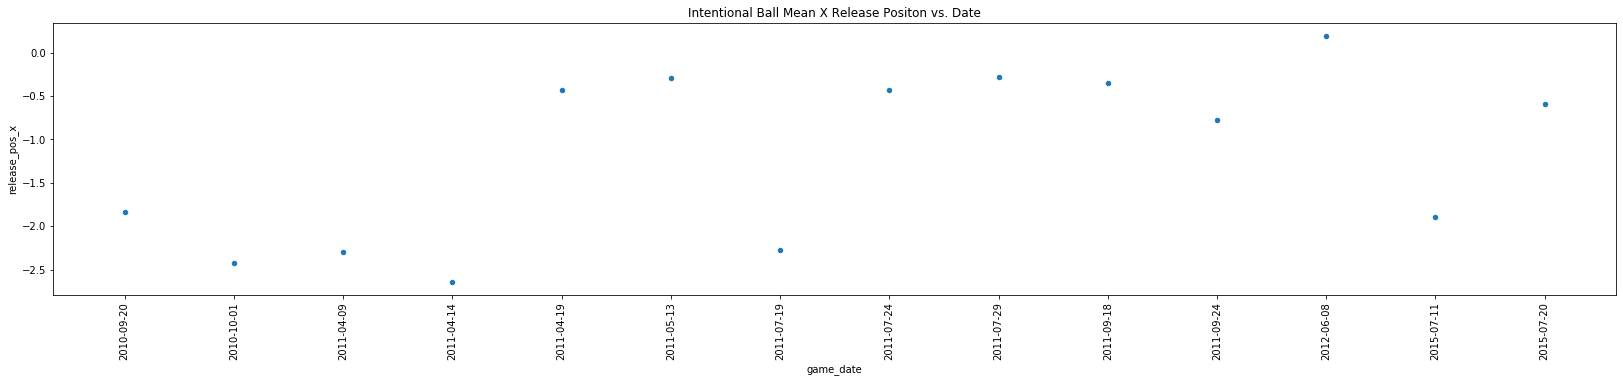

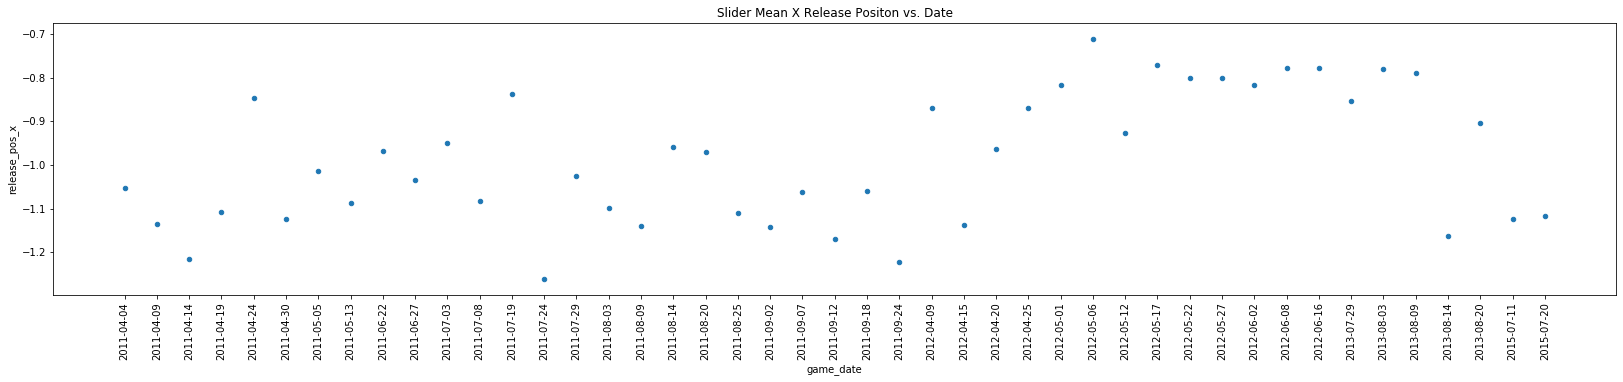

In [8]:
# Plot mean pitch release X location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_x",  
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, figsize=(28,5))

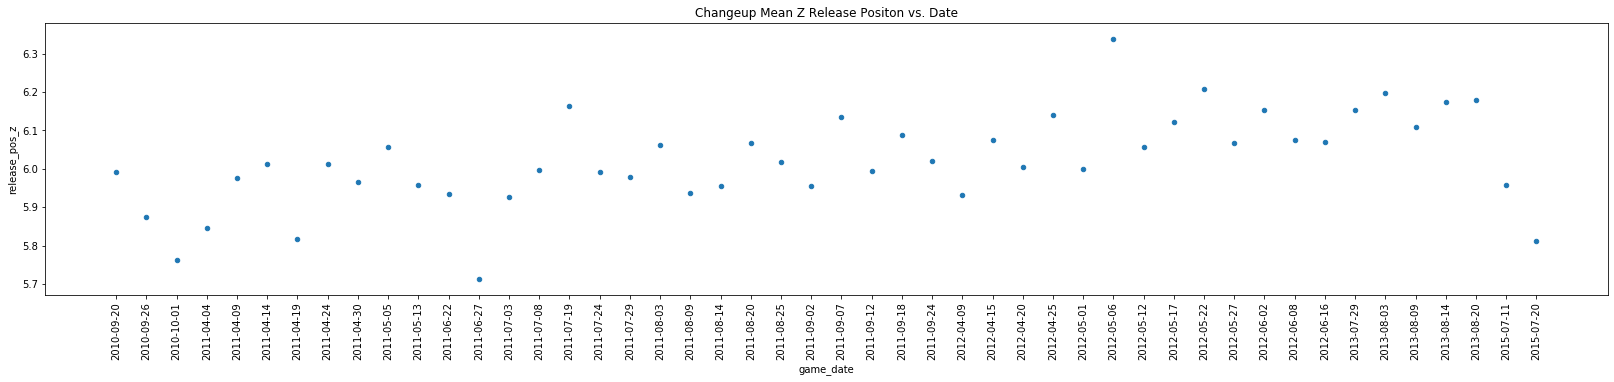

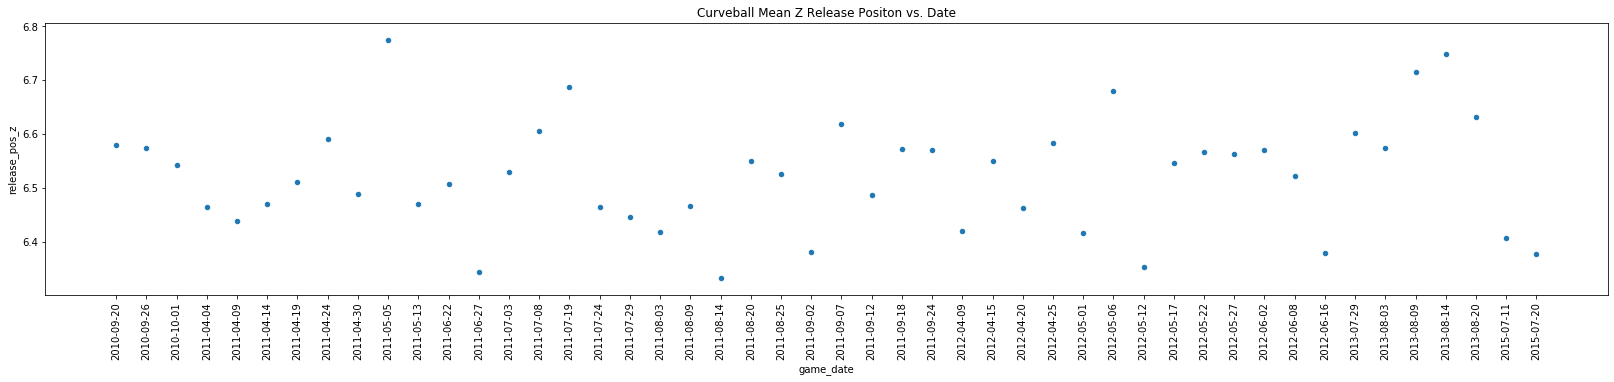

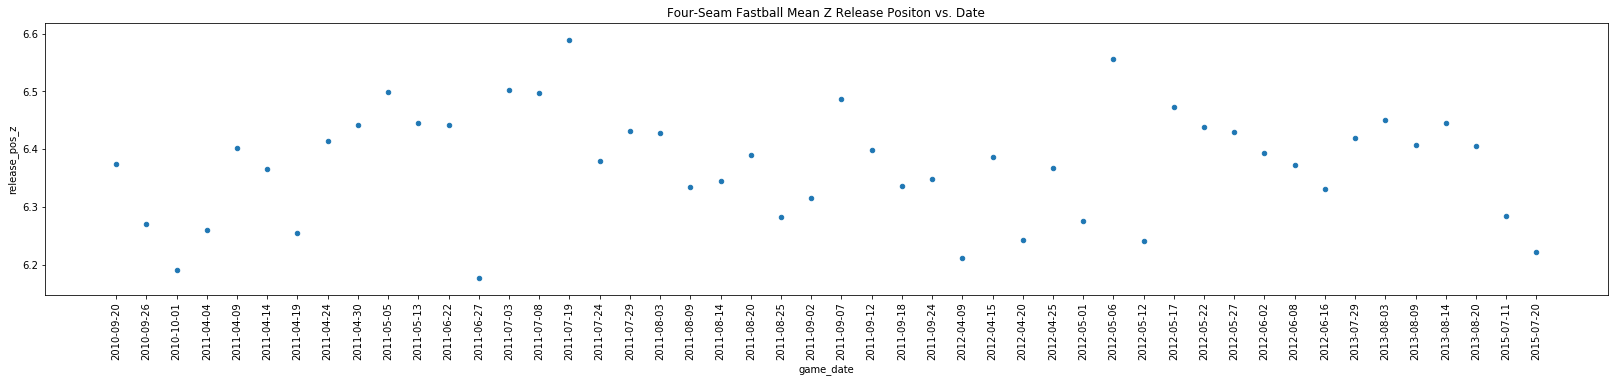

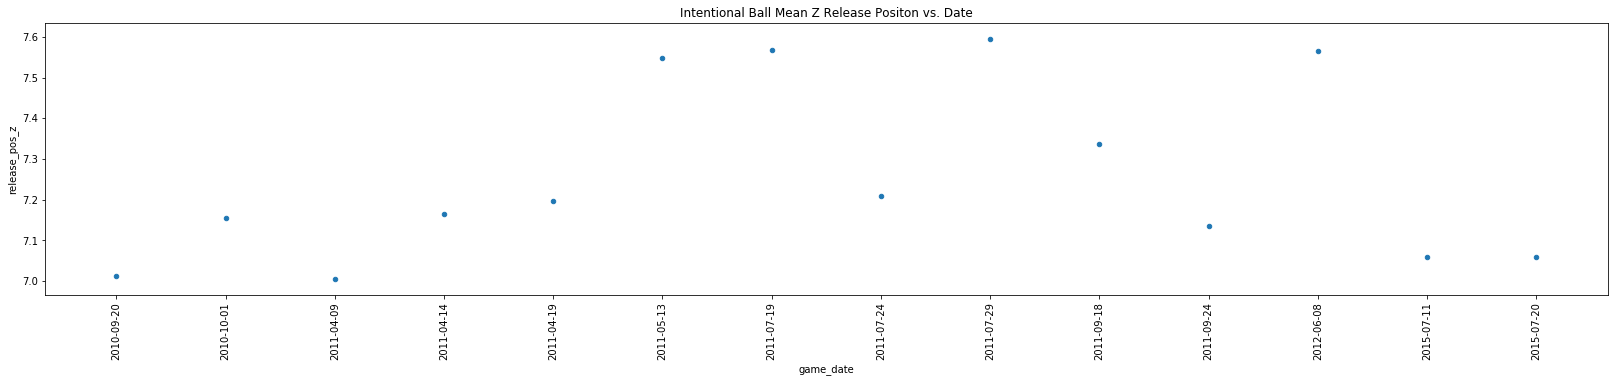

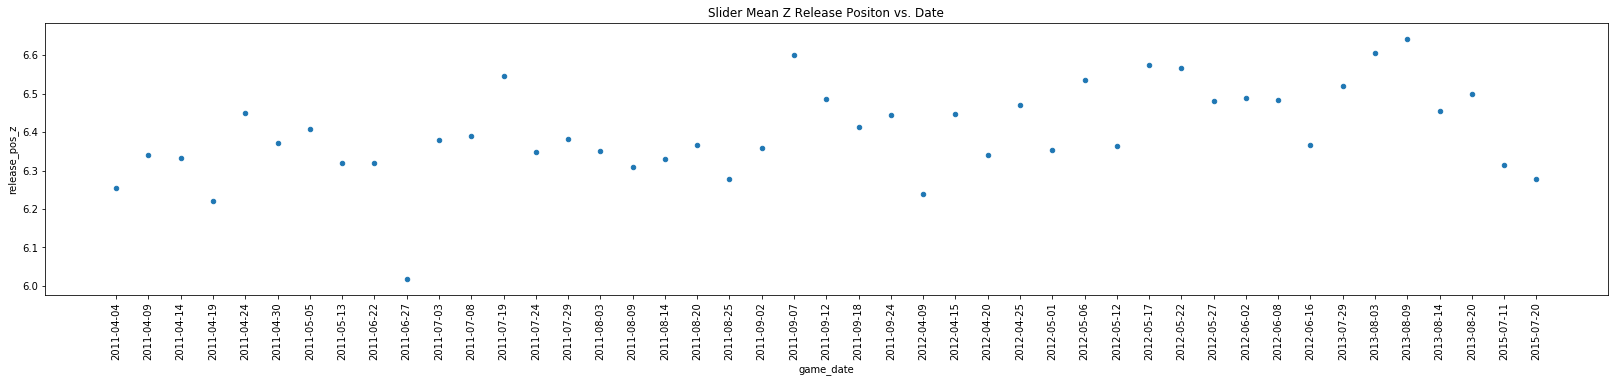

In [9]:
# Plot mean pitch release Z location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_z", 
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, figsize=(28,5))

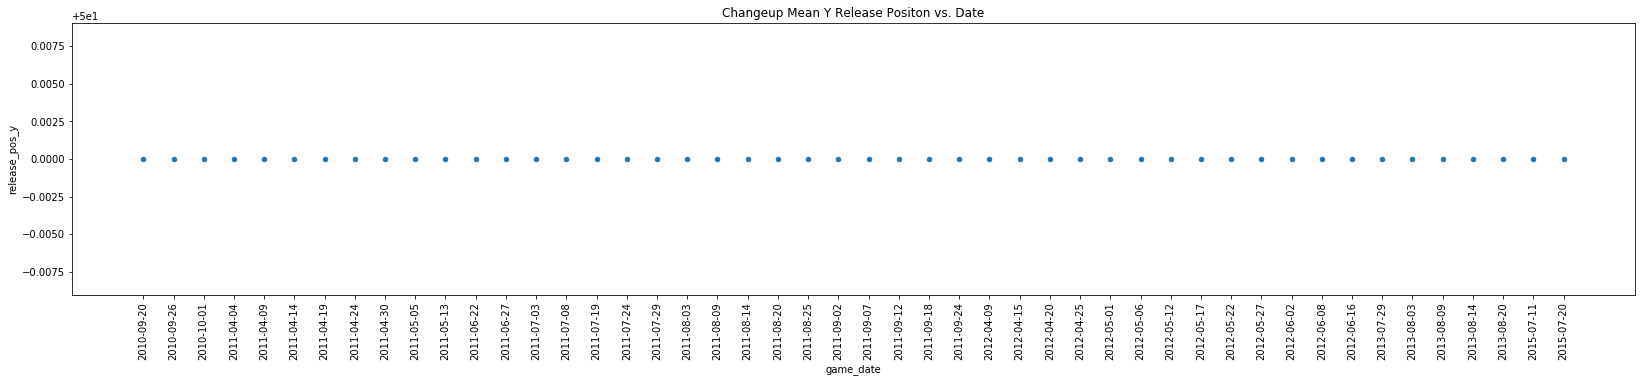

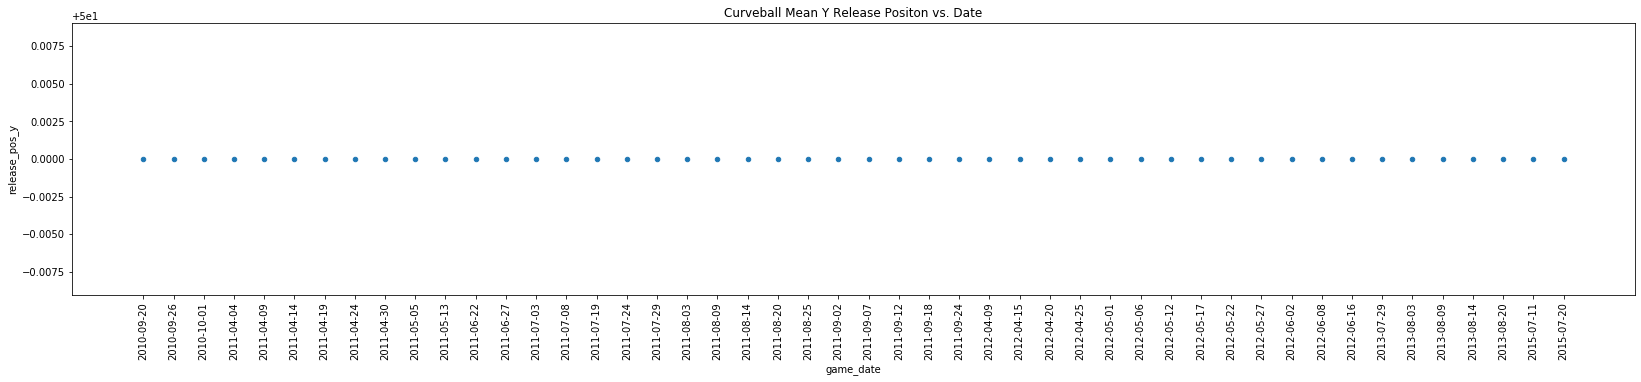

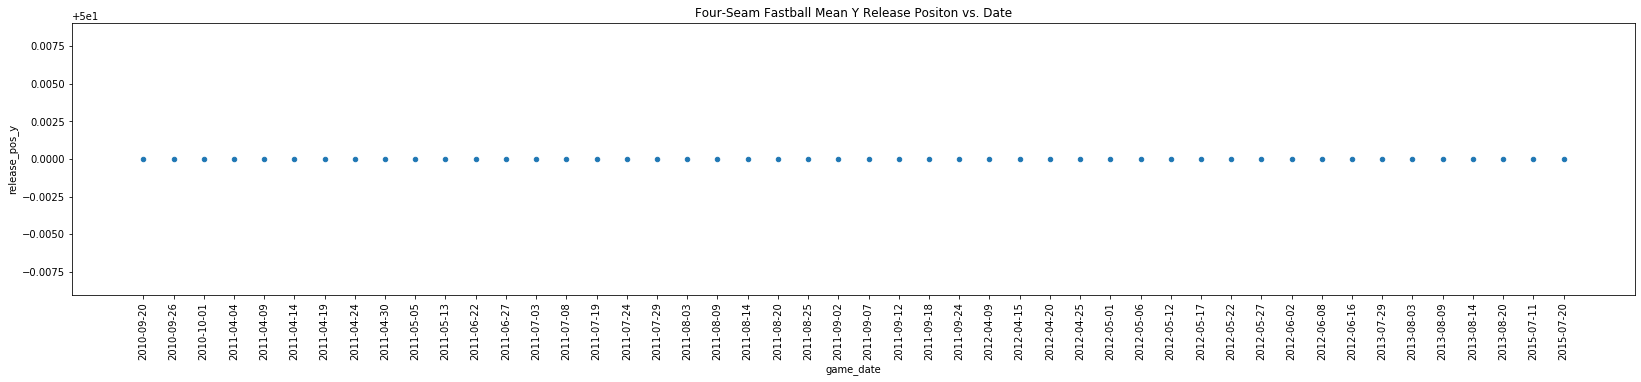

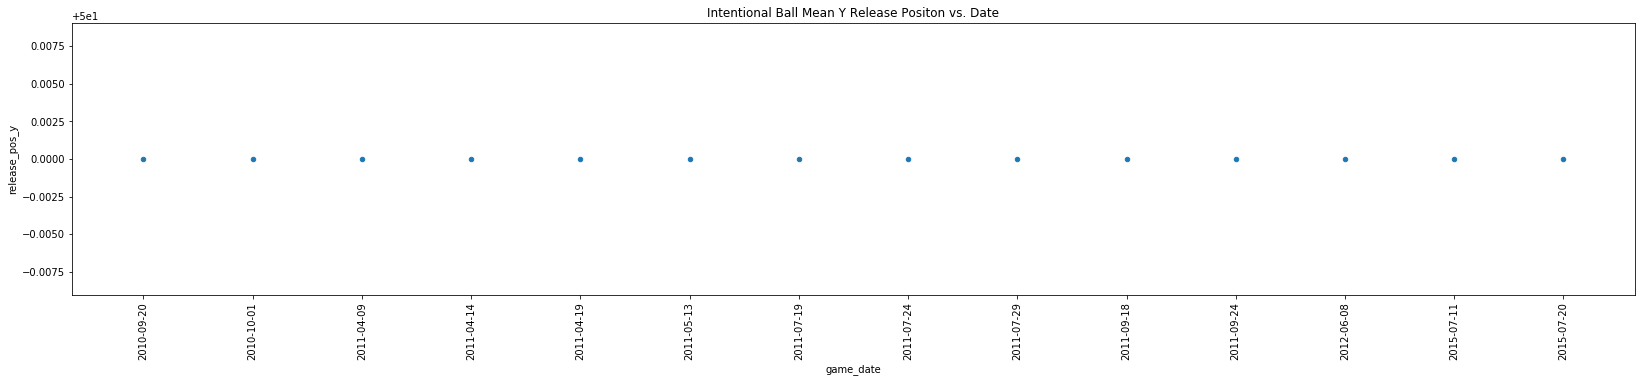

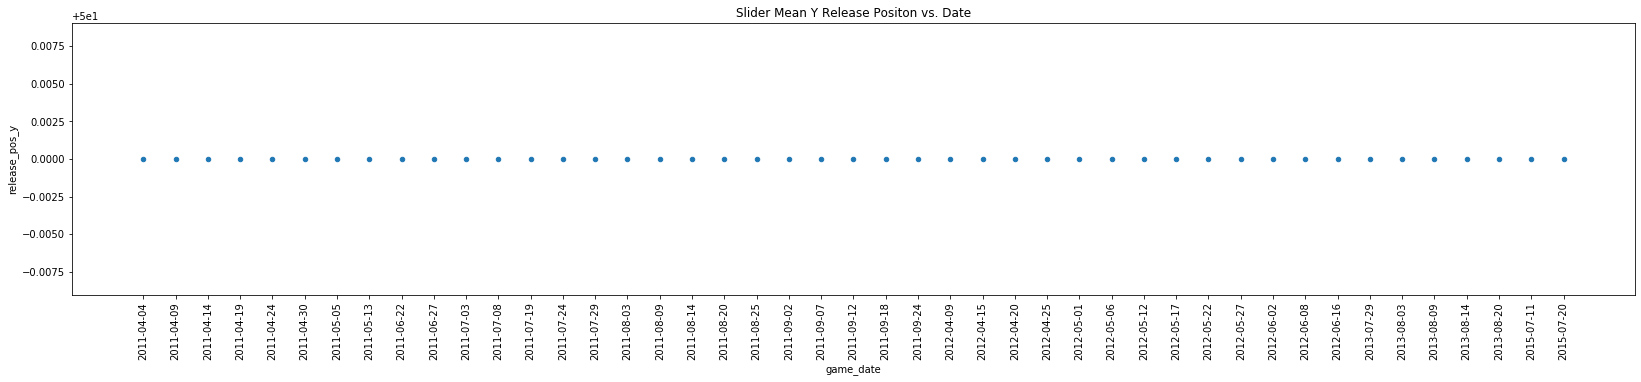

In [10]:
# Plot mean pitch release Y location at each game
for pitch in pitches:
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    ax = graph.plot(kind="scatter", x="game_date", y="release_pos_y", 
              title=f"{pitch[1]} Mean Y Release Positon vs. Date", rot=90, figsize=(28,5))

All 0's in the y-axis data leads me to beleive this is not accurate and will not be used for further analysis.

In [11]:
# Investigate dates around 6/18/2012 (UCL Injury)
date = ["2011-12-31", "2013-01-01"]
inj_pitches = []
for pitch in pitches:
    if (len(date)==1):
        inj_pitches.append([pitch[0].loc[pitch[0]["game_date"]<date[0]], pitch[1]])
    else:
        inj_pitches.append([pitch[0].loc[(pitch[0]["game_date"]>date[0])&
                                         (pitch[0]["game_date"]<date[1])], pitch[1]])

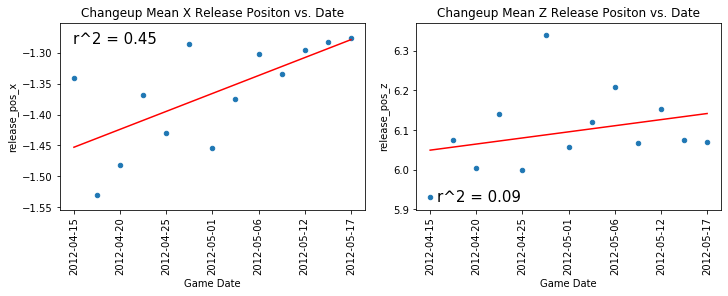

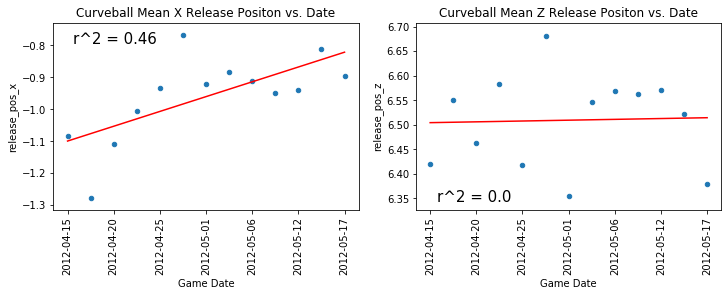

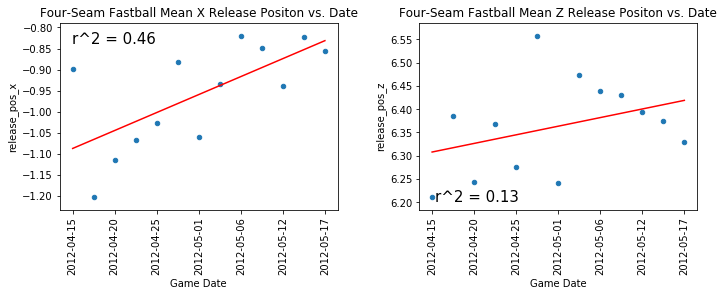

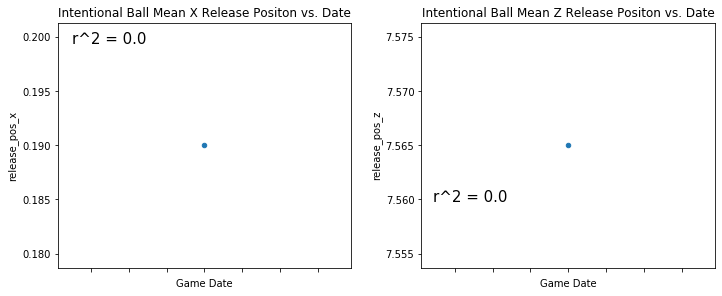

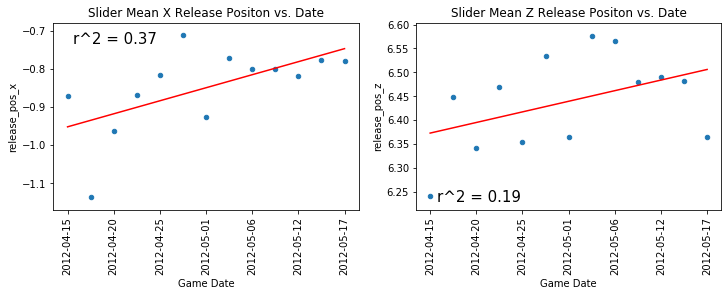

In [12]:
# Plot mean pitch release X,Z location at game date range
for pitch in inj_pitches:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), constrained_layout=True)
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    x_values = np.arange(len(graph["game_date"]))
    graph["x_values"] = x_values
    graph.plot(kind="scatter", x="x_values", y="release_pos_x",   
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, ax=ax[0])
    graph.plot(kind="scatter", x="x_values", y="release_pos_z",  
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, ax=ax[1])
    
    # Linear regression analysis
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_x"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[0].plot(graph["x_values"], regressValues, "red")
    ax[0].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black",
                  xy=(.1,.85), xycoords="figure fraction")
    
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_z"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[1].plot(graph["x_values"], regressValues, "red")
    ax[1].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black", 
                  xy=(.6,.32), xycoords="figure fraction")
    
    ax[0].set_xticklabels(graph["game_date"])
    ax[0].set_xlabel("Game Date")
    ax[1].set_xticklabels(graph["game_date"])
    ax[1].set_xlabel("Game Date")

x-axis pitch release graphs show a moderate positive trend for several pitch types

In [13]:
# Compare to a baseline time period
date2 = ["2010-06-31", "2012-01-01"]
baseline_pitches = []
for pitch in pitches:
    if (len(date2)==1):
        baseline_pitches.append([pitch[0].loc[pitch[0]["game_date"]<date2[0]], pitch[1]])
    else:
        baseline_pitches.append([pitch[0].loc[(pitch[0]["game_date"]>date2[0])&
                                         (pitch[0]["game_date"]<date2[1])], pitch[1]])

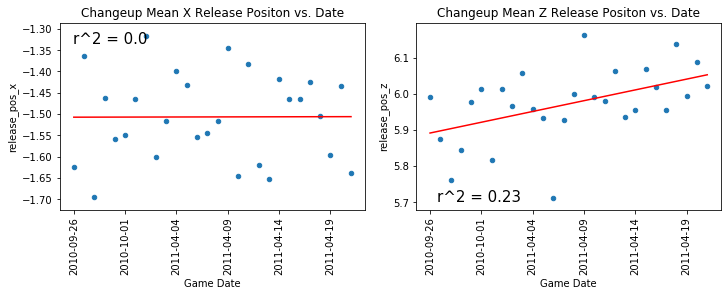

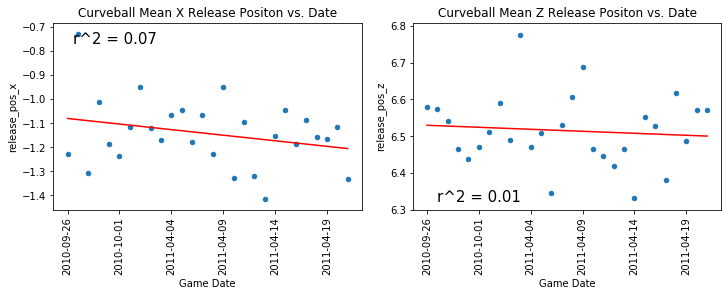

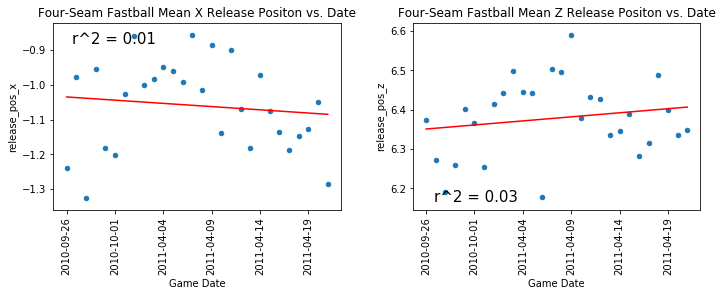

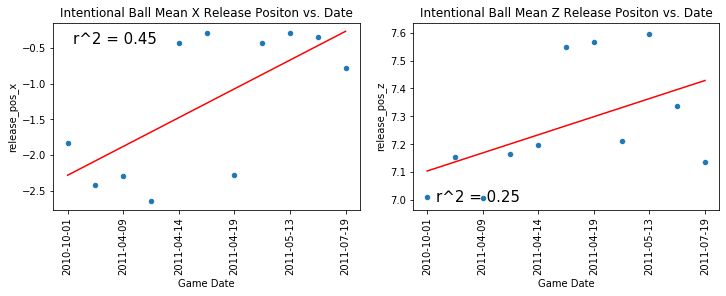

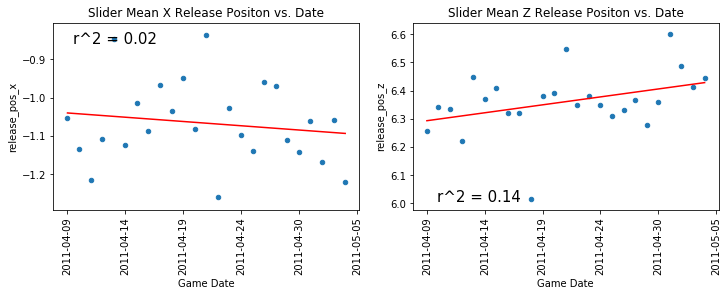

In [14]:
# Plot mean pitch release X,Z location at game date range
for pitch in baseline_pitches:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), constrained_layout=True)
    graph = pitch[0].groupby("game_date").mean()
    graph = graph.reset_index()
    x_values = np.arange(len(graph["game_date"]))
    graph["x_values"] = x_values
    graph.plot(kind="scatter", x="x_values", y="release_pos_x",   
              title=f"{pitch[1]} Mean X Release Positon vs. Date", rot=90, ax=ax[0])
    graph.plot(kind="scatter", x="x_values", y="release_pos_z",  
              title=f"{pitch[1]} Mean Z Release Positon vs. Date", rot=90, ax=ax[1])
    
    # Linear regression analysis
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_x"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[0].plot(graph["x_values"], regressValues, "red")
    ax[0].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black",
                  xy=(.1,.85), xycoords="figure fraction")
    
    (slope, intercept, rvalue, pvalue, sterr) = linregress(graph["x_values"], 
                                                           graph["release_pos_z"])
    regressValues = (slope*graph["x_values"]) + intercept
    ax[1].plot(graph["x_values"], regressValues, "red")
    ax[1].annotate(f"r^2 = {round(rvalue**2,2)}",fontsize=15,color="black", 
                  xy=(.6,.32), xycoords="figure fraction")
    
    ax[0].set_xticklabels(graph["game_date"])
    ax[0].set_xlabel("Game Date")
    ax[1].set_xticklabels(graph["game_date"])
    ax[1].set_xlabel("Game Date")

Aside from intentional balls (which may not be a good indicator of pitching form), this baseline time period does not show a trend in x-axis release point when compared to the timeframe leading up to the injury.